<a href="https://colab.research.google.com/github/jgehunter/stock_price_prediction/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Train data

from google.colab import files
uploaded = files.upload()

Saving GOOGLE.parquet to GOOGLE.parquet


In [3]:
train_data = pd.read_parquet("GOOGLE.parquet")

In [4]:
train_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-12-31,537.739990,538.400024,530.200012,530.659973,1232400
2015-01-02,532.599976,535.799988,527.880005,529.549988,1324000
2015-01-05,527.150024,527.989990,517.750000,519.460022,2059100
2015-01-06,520.500000,521.210022,505.549988,506.640015,2722800
2015-01-07,510.950012,511.489990,503.649994,505.149994,2345900


In [5]:
training_set = train_data.iloc[:, 3:4].values

In [6]:
# Normalizing data, scale between 0 and 1:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

training_data_scaled = sc.fit_transform(training_set)

In [7]:
training_data_scaled.shape

(1545, 1)

In [8]:
X_train = []
y_train = []
cutof_idx = round(0.9*training_data_scaled.shape[0])

for i in range(60, cutof_idx):
  X_train.append(training_data_scaled[i-60:i, 0])
  y_train.append(training_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# Building Model:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, 
                               input_shape=(X_train.shape[1], 1)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
42/42 [==============================] - 11s 14ms/step - loss: 0.0309
Epoch 2/100
42/42 [==============================] - 1s 12ms/step - loss: 0.0024
Epoch 3/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 4/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0022
Epoch 5/100
42/42 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 6/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0017
Epoch 7/100
42/42 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 8/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 9/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 10/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 11/100
42/42 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 12/100
42/42 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 13/100
42/42 [====

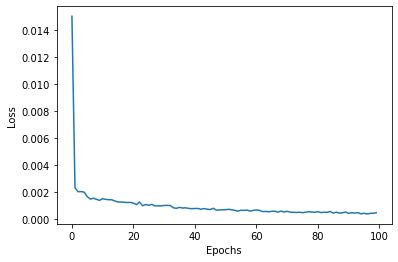

In [13]:
plt.plot(hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [14]:
X_test = []
for i in range(0, len(training_data_scaled)-cutof_idx-60):
    X_test.append(training_data_scaled[cutof_idx+i:cutof_idx+60+i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [15]:
predicted_stock_price = model.predict(X_test)

In [16]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [17]:
real_stock_price = sc.inverse_transform(training_data_scaled[cutof_idx:])

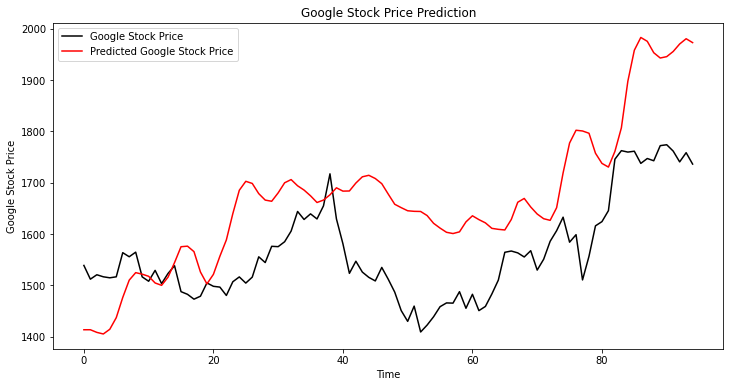

In [19]:
plt.figure(figsize=(12, 6))

plt.plot(real_stock_price[:len(predicted_stock_price)], color='black', label='Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()